In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold

ps = PorterStemmer()

sns.set_style("whitegrid")

In [2]:
df = pd.read_json('train.json')
df.drop(columns=['id'], inplace=True)
display(df.head(20))
print('number of data points: ', len(df))

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."


number of data points:  39774


In [3]:
  >>> import nltk
  >>> nltk.download('stopwords')
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krbon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krbon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
new = []
for s in df['ingredients']:
    s = ' '.join(s)
    new.append(s)

In [5]:
df['ing'] = new

In [6]:
import re
l=[]
for s in df['ing']:
    
    #Remove punctuations
    s=re.sub(r'[^\w\s]','',s)
    
    #Remove Digits
    s=re.sub(r"(\d)", "", s)
    
    #Remove content inside paranthesis
    s=re.sub(r'\([^)]*\)', '', s)
    
    #Remove Brand Name
    s=re.sub(u'\w*\u2122', '', s)
    
    #Convert to lowercase
    s=s.lower()
    
    #Remove Stop Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    s=','.join(filtered_sentence)
    
    #Remove low-content adjectives
    
    
    #Porter Stemmer Algorithm
    words = word_tokenize(s)
    word_ps=[]
    for w in words:
       word_ps.append(ps.stem(w))
    s=' '.join(word_ps)
    
    l.append(s)
df['ing_mod']=l

In [7]:
np.shape(l[0])
display(df.ing_mod.values)


array(['romain , lettuc , black , oliv , grape , tomato , garlic , pepper , purpl , onion , season , garbanzo , bean , feta , chees , crumbl',
       'plain , flour , ground , pepper , salt , tomato , ground , black , pepper , thyme , egg , green , tomato , yellow , corn , meal , milk , veget , oil',
       'egg , pepper , salt , mayonais , cook , oil , green , chili , grill , chicken , breast , garlic , powder , yellow , onion , soy , sauc , butter , chicken , liver',
       ...,
       'egg , citru , fruit , raisin , sourdough , starter , flour , hot , tea , sugar , ground , nutmeg , salt , ground , cinnamon , milk , butter',
       'boneless , chicken , skinless , thigh , minc , garlic , steam , white , rice , bake , powder , corn , starch , dark , soy , sauc , kosher , salt , peanut , flour , scallion , chines , rice , vinegar , vodka , fresh , ginger , egg , white , broccoli , toast , sesam , seed , sugar , store , bought , low , sodium , chicken , stock , bake , soda , shaox , wi

In [8]:

all_ingredients = tuple(df.ing_mod.values)

In [9]:
words = word_tokenize(' '.join(all_ingredients))
print(len(words))

1569574


In [10]:
unique_words, counts = np.unique(words, return_counts=True)
print('unique words: ', unique_words)
print('num unique words: ', len(unique_words))
print('counts: ', counts)

unique words:  [',' 'abalon' 'abbamel' ... 'ziti' 'zucchini' 'épice']
num unique words:  2668
counts:  [764900      2      1 ...     38    931      4]


In [11]:
highest_count_indices = np.argsort(counts)[-100:]
highest_counts = np.flip(counts[highest_count_indices])
most_unique_words = np.flip(unique_words[highest_count_indices])


In [12]:
print(highest_counts[1:])
print(most_unique_words[1:]) #',' is index zero, remove this

[27189 24625 23323 19242 18941 18256 17853 13232 12502 12284 11776 11536
 11205 10557  9790  9189  9089  9039  8851  8846  8624  8238  8227  8177
  7854  7146  7112  6101  6073  5950  5936  5823  5784  5580  5396  5387
  5347  4972  4930  4887  4644  4635  4504  4315  4275  4150  4038  3994
  3861  3517  3383  3335  3232  3180  3106  3081  3043  3035  2950  2947
  2945  2924  2917  2752  2747  2730  2696  2640  2612  2544  2474  2465
  2422  2367  2299  2283  2276  2241  2225  2220  2218  2174  2140  2136
  2101  2095  2067  2026  2022  2018  1986  1954  1952  1911  1909  1898
  1896  1890  1889]
['pepper' 'salt' 'oil' 'onion' 'garlic' 'ground' 'fresh' 'sauc' 'sugar'
 'oliv' 'chees' 'chicken' 'tomato' 'black' 'water' 'red' 'green' 'egg'
 'flour' 'powder' 'butter' 'chop' 'dri' 'clove' 'white' 'juic' 'chili'
 'cream' 'rice' 'cilantro' 'veget' 'milk' 'lemon' 'leav' 'larg' 'ginger'
 'corn' 'vinegar' 'lime' 'soy' 'cumin' 'allpurpos' 'broth' 'wine' 'bell'
 'parsley' 'seed' 'bean' 'cook' 'ses

In [13]:
one_hot_df = df.copy()
one_hot_df.head(5)

for word in most_unique_words[1:]:
    one_hot_df[word] = pd.Series([], dtype=int)
    for i in range(len(one_hot_df)):
        one_hot_df.loc[i, word] = int(word in one_hot_df.loc[i, 'ing_mod'])
    one_hot_df[word] = one_hot_df[word].astype(int)
display(one_hot_df)

,cuisine,ingredients,ing,ing_mod,pepper,salt,oil,onion,garlic,ground,...,spray,flake,sour,scallion,paprika,stock,purpl,starch,hot,slice
0,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,"romain , lettuc , black , oliv , grape , tomat...",1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,"plain , flour , ground , pepper , salt , tomat...",1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,"egg , pepper , salt , mayonais , cook , oil , ...",1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,"water , veget , oil , wheat , salt",0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,"black , pepper , shallot , cornflour , cayenn ...",1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,"[light brown sugar, granulated sugar, butter, ...",light brown sugar granulated sugar butter warm...,"light , brown , sugar , granul , sugar , butte...",0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39770,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",KRAFT Zesty Italian Dressing purple onion broc...,"kraft , zesti , italian , dress , purpl , onio...",1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
39771,irish,"[eggs, citrus fruit, raisins, sourdough starte...",eggs citrus fruit raisins sourdough starter fl...,"egg , citru , fruit , raisin , sourdough , sta...",0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
39772,chinese,"[boneless chicken skinless thigh, minced garli...",boneless chicken skinless thigh minced garlic ...,"boneless , chicken , skinless , thigh , minc ,...",0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0


In [14]:
X = one_hot_df.iloc[:, 5:]
y = one_hot_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [19]:
kfold = StratifiedKFold(5, shuffle=True, random_state=10)
max_neighbors = 30
knn_accs = np.zeros((5, max_neighbors))
i = 0
for train_index, test_index in kfold.split(X_train, y_train.values):
    X_tt = X_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_tt = y_train.iloc[train_index]
    y_ho = y_train.iloc[test_index]
    j = 0
    for k in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(k)
        knn.fit(X_tt.values, y_tt.values)
        
        pred = knn.predict(X_ho.values)
        
        knn_accs[i,j] = accuracy_score(y_ho.values, pred)
        j = j + 1
    i = i + 1

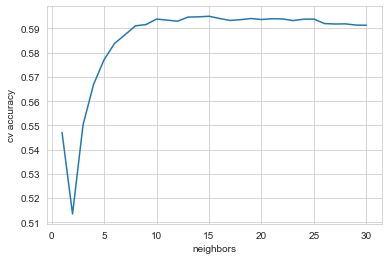

Highest Accuracy:  0.5951  with  15  neighbors


In [34]:
accuracies = np.mean(knn_accs, axis=0)
plt.figure()
plt.plot(np.arange(1, 31, 1), accuracies)
plt.xlabel('neighbors')
plt.ylabel('cv accuracy')
plt.show()
print('Highest Accuracy: ', np.round(np.max(accuracies), 4), ' with ', np.argmax(accuracies)+1, ' neighbors')

In [32]:
kfold = StratifiedKFold(5, shuffle=True, random_state=10)
num_ingredients = np.arange(20, 101, 10)
ing_accs = np.zeros((5, len(num_ingredients)))
i = 0
for train_index, test_index in kfold.split(X_train, y_train.values):
    X_tt = X_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_tt = y_train.iloc[train_index]
    y_ho = y_train.iloc[test_index]
    j = 0
    for k in num_ingredients:
        knn = KNeighborsClassifier(15)
        knn.fit(X_tt.iloc[:, :k].values, y_tt.values)
        
        pred = knn.predict(X_ho.iloc[:, :k].values)
        
        ing_accs[i,j] = accuracy_score(y_ho.values, pred)
        j = j + 1
    i = i + 1

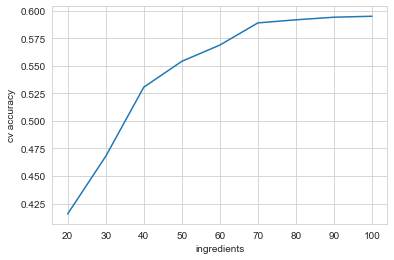

Highest Accuracy:  0.5951  with  100  ingredients


In [33]:
accuracies = np.mean(ing_accs, axis=0)
plt.figure()
plt.plot(num_ingredients, accuracies)
plt.xlabel('ingredients')
plt.ylabel('cv accuracy')
plt.show()
print('Highest Accuracy: ', np.round(np.max(accuracies), 4), ' with ', num_ingredients[np.argmax(accuracies)], ' ingredients')